# Koalitionsvertrag Analyse

Hier schaue ich mir die Ergebnisse des Koalitionsvertrages an.

In [1]:
import pandas as pd

df = pd.read_csv('koalitionsvertrag_final.tsv', sep='\t', header=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        3212 non-null   int64  
 1   Sentence     3212 non-null   object 
 2   spd          3203 non-null   float64
 3   gruene       3203 non-null   float64
 4   fdp          3203 non-null   float64
 5   Most likely  3212 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 150.7+ KB


In [2]:
df.describe()

,Index,spd,gruene,fdp
count,3212.000000,3.203000e+03,3.203000e+03,3203.000000
mean,1605.500000,2.564380e-01,3.397575e-01,0.403804
std,927.368859,3.808002e-01,4.050042e-01,0.423964
min,0.000000,1.654315e-18,2.873689e-09,0.000005
25%,802.750000,5.620098e-05,2.777535e-03,0.018919
50%,1605.500000,7.720974e-03,6.667098e-02,0.154947
75%,2408.250000,5.045242e-01,8.139703e-01,0.947051
max,3211.000000,9.996889e-01,9.999948e-01,1.000000


In [3]:
len(df) # Number of sentences

3212

In [4]:
df['Most likely'].value_counts() # How many sentences were "chosen" by the model?

fdp       1261
gruene    1118
spd        833
Name: Most likely, dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/nlpsimple/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/nlpsimple/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


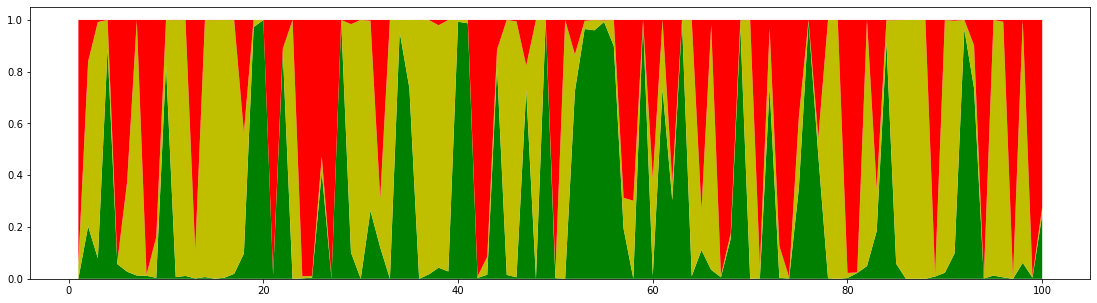

In [5]:
import matplotlib.pyplot as plt
from math import ceil
import numpy as np

bins = 100
bin_size = round(len(df) / bins)
spd = list()
fdp = list()
gruene = list()
for idx in range(0, len(df), bin_size):
  if idx >= len(df) - 1:
    break
  spd_avg = list()
  fdp_avg = list()
  gruene_avg = list()
  for cnt in range(bin_size):
    if idx + bin_size >= len(df) - 1:
      break
    spd_avg.append(df['spd'][idx + bin_size])
    fdp_avg.append(df['fdp'][idx + bin_size])
    gruene_avg.append(df['gruene'][idx + bin_size])
  spd.append(np.mean(spd_avg))
  fdp.append(np.mean(fdp_avg))
  gruene.append(np.mean(gruene_avg))

# spd = df['spd']
# fdp = df['fdp']
# gruene = df['gruene']
# X = range(1, len(df) + 1) # We have ordinal sentences
X = range(1, len(spd) + 1)

fig = plt.figure(figsize=(19, 5))
# fig, ax = plt.subplots(figsize=(19, 10))

# plt.hist(gruene)
plt.stackplot(X, gruene, fdp, spd, colors=["g", "y", "r"])
# plt.plot(X, gruene, color="g")
# plt.plot(X, fdp, color="y")
# plt.plot(X, spd, color="r")

plt.show()

In [6]:
most_spd_sentence = df['Sentence'][df['spd'].idxmax()]
most_fdp_sentence = df['Sentence'][df['fdp'].idxmax()]
most_gruene_sentence = df['Sentence'][df['gruene'].idxmax()]

print("SPD: " + most_spd_sentence)
print("FDP: " + most_fdp_sentence)
print("Grüne: " + most_gruene_sentence)



SPD: Die   Staatsministerin für Kultur und Medien stellt Bündnis 90 / Die Grünen.
FDP: Hersteller haften   für  Schäden,  die  fahrlässig  durch  IT-Sicherheitslücken  in  ihren  Produkten  verursacht  werden.
Grüne: Deutschland und Polen verbindet eine tiefe Freundschaft.


In [7]:
all_spd_sentences = df[df['Most likely'] == 'spd'].sort_values(by=['spd'])['Sentence']
all_fdp_sentences = df[df['Most likely'] == 'fdp'].sort_values(by=['fdp'])['Sentence']
all_gruene_sentences = df[df['Most likely'] == 'gruene'].sort_values(by=['gruene'])['Sentence']

In [8]:
print("+++ SPD +++")
for sent in all_spd_sentences.values[:10]:
  print(sent.replace("  ", " ").replace("  ", " "))
  print("")

print("+++ GRÜNE +++")
for sent in all_gruene_sentences.values[:10]:
  print(sent.replace("  ", " ").replace("  ", " "))
  print("")

print("+++ FDP +++")
for sent in all_fdp_sentences.values[:10]:
  print(sent.replace("  ", " ").replace("  ", " "))
  print("")

+++ SPD +++
Wir wollen Europa zu einem Kontinent des nachhaltigen Fortschritts machen und international vorangehen.

Die in anderen Bereichen bewährte Sicherheitsüberprüfung von Bewerberinnen und Bewerbern weiten wir aus und stärken so die Resilienz der Sicherheitsbehörden gegen demokratiefeindliche Einflüsse.

Innovativen Materialien, Technologien und Start-ups wollen wir den Markteintritt und Zulassungen erleichtern.

Wir werden dabei die Praxis und betroffene Kreise aus der Gesellschaft und Vertreterinnen und Vertreter des Parlaments besser einbinden sowie die Erfahrungen und Erfordernisse von Ländern und Kommunen bei der konkreten Gesetzesausführung berücksichtigen.

Dazu beseitigen wir alle Hemmnisse, u. a. werden wir Netzanschlüsse und die Zertifizierung beschleunigen, Vergütungssätze anpassen, die Ausschreibungspflicht für große Dachanlagen und die Deckel prüfen.

2 StGB explizit aufnehmen.

Wir ratifizieren das Übereinkommen Nr. 184 der Internationalen Arbeitsorganisation (ILO)

In [11]:
# Now let's just for fun look at the used subjects, verbs, and objects. We'll use Stanza for that
import stanza
from collections import Counter

nlp = stanza.Pipeline('de', processors="tokenize,pos,lemma,mwt,depparse")

2021-12-02 11:33:55 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

2021-12-02 11:33:55 INFO: Use device: cpu
2021-12-02 11:33:55 INFO: Loading: tokenize
2021-12-02 11:33:55 INFO: Loading: mwt
2021-12-02 11:33:55 INFO: Loading: pos
2021-12-02 11:33:55 INFO: Loading: lemma
2021-12-02 11:33:55 INFO: Loading: depparse
2021-12-02 11:33:56 INFO: Done loading processors!


In [80]:
from tqdm.notebook import tqdm

all_verbs = Counter()
all_subjects = Counter()
all_objects = Counter()

POS = [
  'NOUN',
  'PROPN',
  'PRON'
]

subject_deprels = [
  'csubj',
  'csubj:pass',
  'nsubj',
  'nsubj:pass'
]

object_deprels = [
  'obl',
  'obj',
  'iobj'
]

for sentence in tqdm(df['Sentence'], desc="Parsing sentences", unit="sentence"):
  doc = nlp(sentence)
  for word in doc.sentences[0].words: # There's only one sentence in here
    if word.deprel == 'root': # Roots are the verbs
      all_verbs.update([word.text.lower()])
    elif word.deprel in subject_deprels and word.upos in POS:
      all_subjects.update([word.text.lower()])
    elif word.deprel in object_deprels and word.upos in POS:
      all_objects.update([word.text.lower()])

print(f"There are {len(all_verbs)} verbs, {len(all_subjects)} subjects, and {len(all_objects)} objects in the Koalitionsvertrag.")

Parsing sentences:   0%|          | 0/3212 [00:00<?, ?sentence/s]

There are 921 verbs, 947 subjects, and 2902 objects in the Koalitionsvertrag.


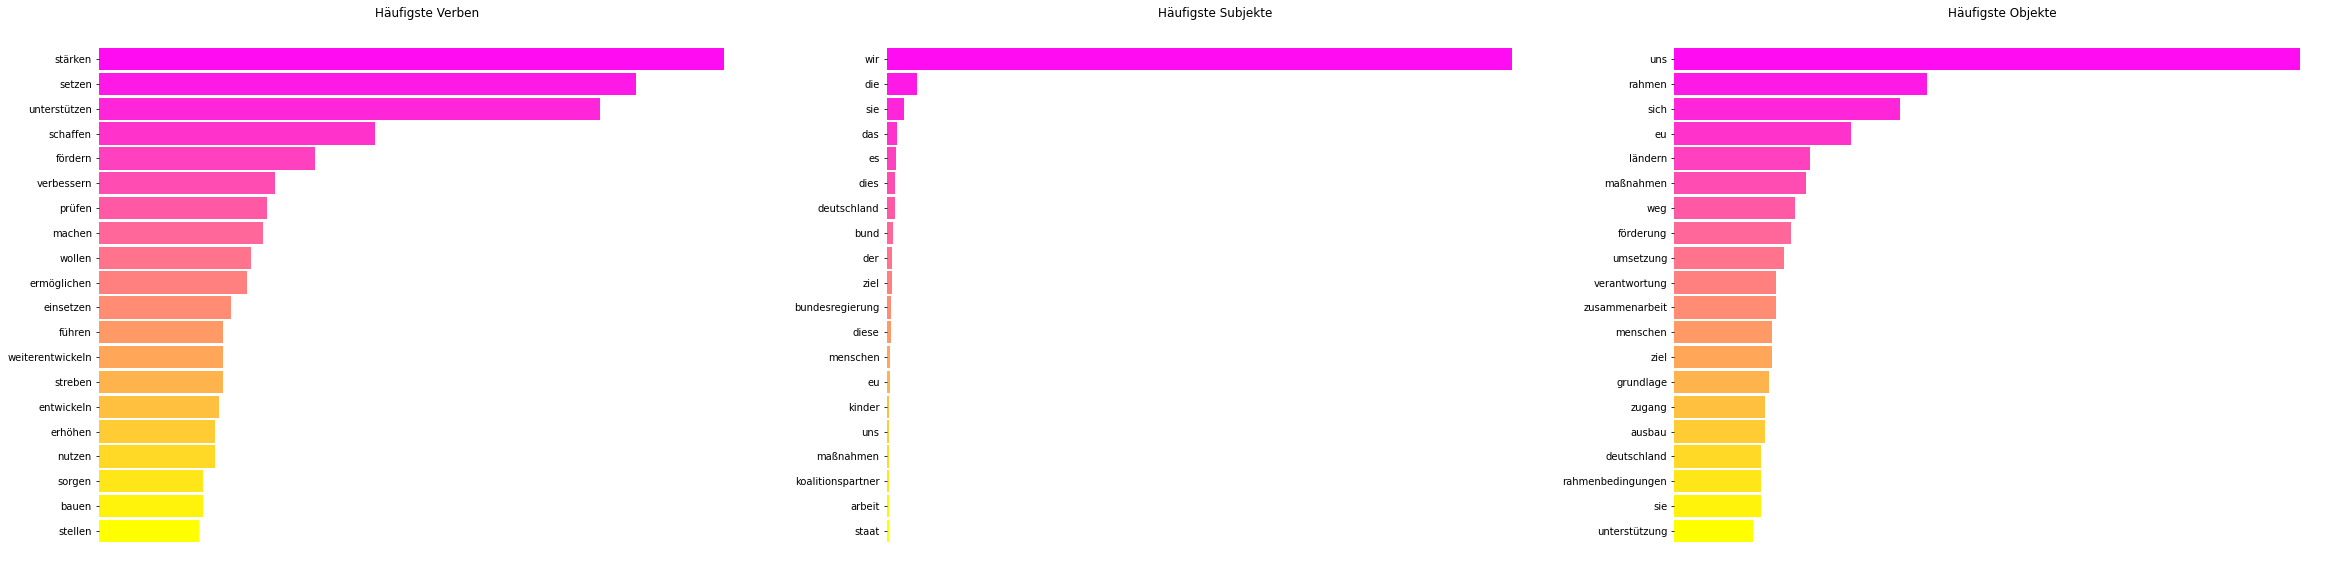

In [89]:
# Plot the words
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(40, 10))

get_color = plt.get_cmap('spring')
fig.patch.set_facecolor('white')

# First: Verbs, then subjects, then objects
for idx, cnt in enumerate([all_verbs, all_subjects, all_objects]):
  words, counts = zip(*cnt.most_common(20))
  words, counts = list(words), list(counts)
  words.reverse()
  counts.reverse()
  # Plot
  ax[idx].barh(words, counts, height=.9, color=[get_color(1-idx/len(counts)) for idx, _ in enumerate(counts)])
  # Adapt style
  ax[idx].get_xaxis().set_ticks([])
  if idx == 0:
    ax[idx].set_title("Häufigste Verben")
  elif idx == 1:
    ax[idx].set_title("Häufigste Subjekte")
  else:
    ax[idx].set_title("Häufigste Objekte")
  ax[idx].spines['top'].set_visible(False)
  ax[idx].spines['right'].set_visible(False)
  ax[idx].spines['bottom'].set_visible(False)
  ax[idx].spines['left'].set_visible(False)

In [22]:
all_subjects.most_common(20)

[('Wir', 1139),
 ('wir', 974),
 ('die', 102),
 ('sie', 36),
 ('Deutschland', 28),
 ('das', 28),
 ('Sie', 24),
 ('Bund', 22),
 ('es', 21),
 ('der', 19),
 ('Ziel', 19),
 ('Dies', 18),
 ('Bundesregierung', 15),
 ('Menschen', 13),
 ('EU', 13),
 ('dies', 12),
 ('Es', 10),
 ('Kinder', 9),
 ('uns', 9),
 ('Maßnahmen', 8)]

In [23]:
all_objects.most_common(20)

[('uns', 164),
 ('Rahmen', 67),
 ('sich', 60),
 ('EU', 47),
 ('Ländern', 36),
 ('Maßnahmen', 35),
 ('Weg', 32),
 ('Förderung', 31),
 ('Umsetzung', 29),
 ('Verantwortung', 27),
 ('Zusammenarbeit', 27),
 ('Menschen', 26),
 ('Ziel', 26),
 ('Grundlage', 25),
 ('Zugang', 24),
 ('Ausbau', 24),
 ('Deutschland', 23),
 ('Rahmenbedingungen', 23),
 ('sie', 23),
 ('Unterstützung', 21)]

In [87]:
len(Counter(" ".join(df['Sentence'].values).split()))

12699

In [88]:
all_verbs.most_common()

[('stärken', 156),
 ('setzen', 134),
 ('unterstützen', 125),
 ('schaffen', 69),
 ('fördern', 54),
 ('verbessern', 44),
 ('prüfen', 42),
 ('machen', 41),
 ('wollen', 38),
 ('ermöglichen', 37),
 ('einsetzen', 33),
 ('führen', 31),
 ('weiterentwickeln', 31),
 ('streben', 31),
 ('entwickeln', 30),
 ('erhöhen', 29),
 ('nutzen', 29),
 ('sorgen', 26),
 ('bauen', 26),
 ('stellen', 25),
 ('bringen', 24),
 ('werden', 24),
 ('gilt', 22),
 ('beschleunigen', 22),
 ('evaluieren', 18),
 ('1', 18),
 ('legen', 17),
 ('haben', 16),
 ('ziel', 16),
 ('einführen', 16),
 ('richten', 16),
 ('gestalten', 15),
 ('ausbauen', 15),
 ('erhalten', 15),
 ('erarbeiten', 15),
 ('überprüfen', 15),
 ('gehören', 14),
 ('verankern', 14),
 ('sicherstellen', 14),
 ('geben', 13),
 ('braucht', 13),
 ('umsetzen', 13),
 ('vorantreiben', 13),
 ('modernisieren', 12),
 ('vereinfachen', 12),
 ('sichern', 12),
 ('brauchen', 12),
 ('begleiten', 12),
 ('reduzieren', 12),
 ('schützen', 11),
 ('erleichtern', 11),
 ('ausrichten', 11),
 (

In [90]:
# Let us calculate the KL-Divergence between all distributions

df['Divergenz_spd_gruene'] = (df['spd'] - df['gruene']).abs()
df['Divergenz_spd_fdp'] = (df['spd'] - df['fdp']).abs()
df['Divergenz_gruene_fdp'] = (df['gruene'] - df['fdp']).abs()

In [95]:
# The apply-function just makes sure that there's no scientific notation in the
# output. Makes the values more comparable.
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Index,spd,gruene,fdp,Divergenz_spd_gruene,Divergenz_spd_fdp,Divergenz_gruene_fdp
count,3212.00000,3203.00000,3203.00000,3203.00000,3203.00000,3203.00000,3203.00000
mean,1605.50000,0.25644,0.33976,0.40380,0.52432,0.58401,0.63115
std,927.36886,0.38080,0.40500,0.42396,0.41264,0.40747,0.38493
min,0.00000,0.00000,0.00000,0.00001,0.00000,0.00001,0.00001
25%,802.75000,0.00006,0.00278,0.01892,0.03096,0.10694,0.22313
50%,1605.50000,0.00772,0.06667,0.15495,0.62502,0.76051,0.81282
75%,2408.25000,0.50452,0.81397,0.94705,0.95722,0.98284,0.98042
max,3211.00000,0.99969,0.99999,1.00000,0.99999,1.00000,1.00000
